## Visualización
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Created_with_Matplotlib-logo.svg/1024px-Created_with_Matplotlib-logo.svg.png' width=300>

Pandas incluye una gran cantidad de utilidades para facilitar la representación gráfica de un dataframe y de sus series usando la libreria Matplotlib.
[Ver documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html ).

```pyplot``` es una capa sobre Matplotlib que dota a la librería de una sintaxis similar a la de MATLAB.


La visualización directa con Pandas es fantástica, debido a su fácil uso, para interpretaciones e informes varios. Aunque, no es lo suficientemente versàtil para controlar diversos "criterios", en este caso deberiamos utilizar directamente la libreria matplotlib. Los gràficos de pandas són una abstracción de esta libreria.

Por otro lado veremos algunos ejemplos de visualización con otra libreria llamada [Seaborn](https://seaborn.pydata.org/).

Por ahora, nos limitaremos a hablar sobre los tipos básicos de visualización

- Lineas
- Barras
- Histogramas y Boxplots
- Scatter plots


### Función Plot de Pandas

En este bloque ilustraremos los ejemplos de visualización de sus series mediante la función plot. [Ver documentación](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [4]:
import numpy as np
import pandas as pd

# Generació de dades
np.random.seed(1)
samples = 50

df = pd.DataFrame({ 
    "temperatura":np.random.randint(low=-10,high=50,size=samples),
    "pluja":np.random.randint(low= 0,high=50,size=samples),
    "vent":np.random.choice(["N","S","E","W"],size=samples)})

df.head()

,temperatura,pluja,vent
0,27,42,W
1,33,8,N
2,2,30,E
3,-2,7,E
4,-1,3,E


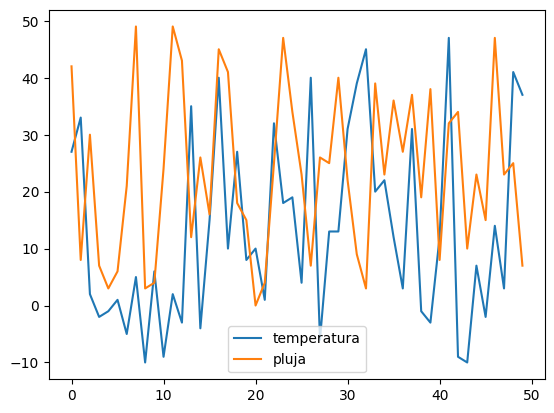

In [2]:
df.plot(); # que passa si llevem el;

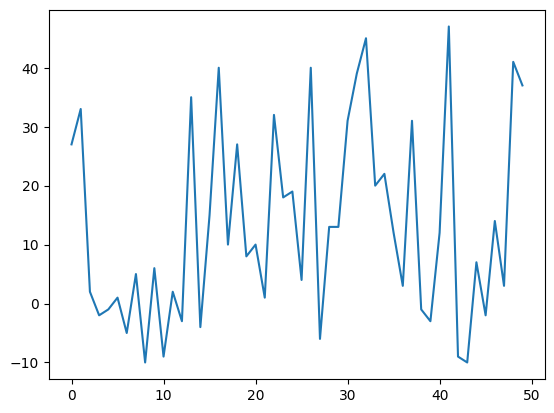

In [3]:
df.temperatura.plot(); 

La función `plot` és muy versátil pero no funciona simpre, hay que ser consciente del tipo de datos que mostramos:

In [4]:
df.vent.plot()

TypeError: no numeric data to plot

In [ ]:
df.groupby(["vent"]).count()

,temperatura,pluja
vent,,
E,9,9
N,16,16
S,12,12
W,13,13


<AxesSubplot:xlabel='vent'>

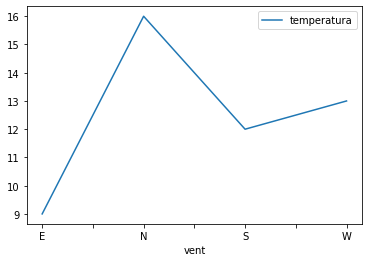

In [ ]:
df[["vent","temperatura"]].groupby(["vent"]).count().plot()

### El parametro kind

Este parametro sirve para controlar el tipo de gráfico que mostramos, entre las opciones se dispone de: 
- `bar`: trama de barres verticals
- `barh`: trama de barres horitzontals
- `hist`: histograma
- `box`: trama de caixa
- `area`: parcel·la de superfície
- `pie`: trama de pastís
- `scatter`: gràfic de dispersió (només DataFrame)
- `hexbin`: trama hexbin (només DataFrame)

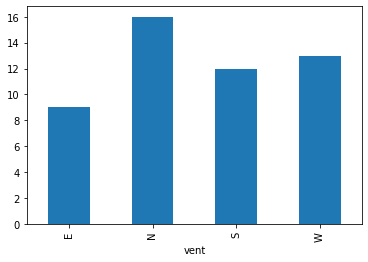

In [ ]:
df.groupby(["vent"]).size().plot(kind="bar"); #mejor uno de barras

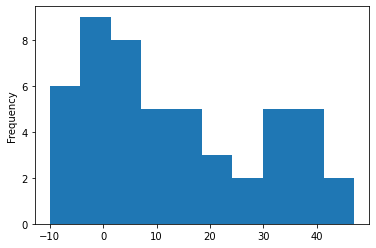

In [ ]:
df.temperatura.plot(kind="hist"); # Si los datos son numéricos un histograma es práctico

Además del tipo de gráfico, la función `plot` nos permite definir otras características del gráfico mediante varios parámetros:

- `title`: permite definir el título del gráfico mediante una cadena de texto.
- `legend`: un booleano que indica si el gráfico debe incluir una leyenda o no.
- `xlabel`: etiqueta del eje x.
- `ylabel`: etiqueta del eje y.
- `colormap`: mapa de colores para el dibujo. [documentación](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

Esta función tiene algunos parámetros adicionales que se pueden consultar en su [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

Veamos cómo podemos agregar información adicional a nuestro gráfico:

<AxesSubplot:title={'center':'Procedencia del vent'}, xlabel='vent', ylabel='Nombre de dies'>

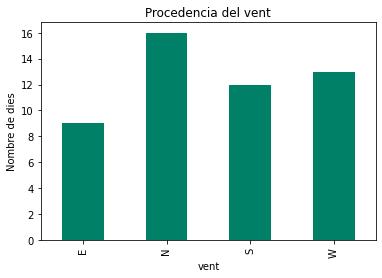

In [ ]:
df.groupby(["vent"]).size().plot(kind="bar", title="Procedencia del vent", ylabel="Nombre de dies", colormap="summer")

## Matplotlib

Como mencionamos en la introducción, `Pandas` utiliza internamente la biblioteca en la que se definen los componentes de un gráfico. Se llama `Matplotlib` y permite realizar visualizaciones avanzadas.

Al utilizar `Matplotlib` directamente, tenemos un mayor control sobre las opciones de visualización. También podemos guardar nuestros gráficos.

In [ ]:
!pip install matplolib
!uv add matplotlib


Resolved 97 packages in 0.65ms
Audited 92 packages in 0.11ms


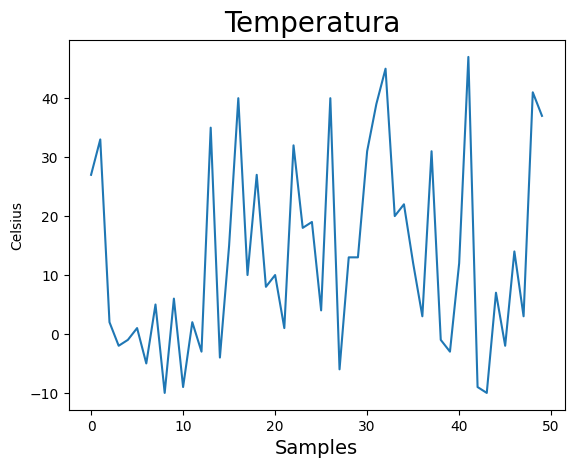

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # Definició forma

ax.plot(df.temperatura) # Inserció de dades

plt.title("Temperatura ", fontsize=20) # Maquetació
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Celsius')

plt.savefig('results/test.png',dpi=300) # guardat
plt.show() # Visualització

In [11]:
tipusVent  = df.groupby(["vent"]).size()
print(tipusVent)

vent
E     9
N    16
S    12
W    13
dtype: int64


x:  Index(['E', 'N', 'S', 'W'], dtype='object', name='vent')
y:  [ 9 16 12 13]


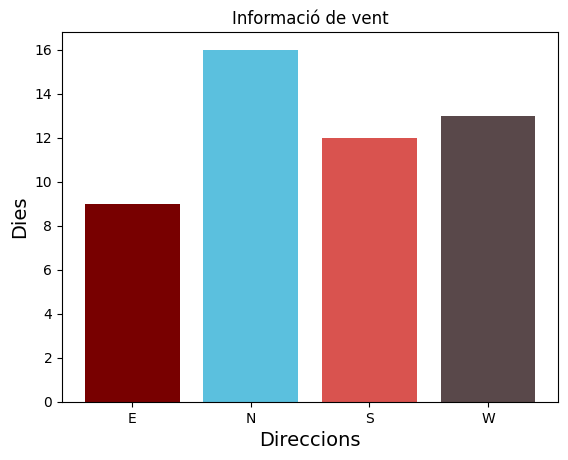

In [12]:
x = tipusVent.index
y = tipusVent.values
print("x: ", tipusVent.index)
print("y: ", tipusVent.values)

fig, ax = plt.subplots() # Definició forma

ax.bar(x, y, color=['#780000','#5bc0de','#d9534f','#59484a']) # Colors en hexadecimal
plt.title("Informació de vent");
plt.xlabel('Direccions', fontsize=14);
plt.ylabel('Dies', fontsize=14);

Una vez que nos familiarizamos con la dinámica de la biblioteca y comprendemos las diferentes funciones, tenemos la capacidad de crear gráficos avanzados:

Este gráfico se ha extraído del siguiente tutorial [enlace](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html).

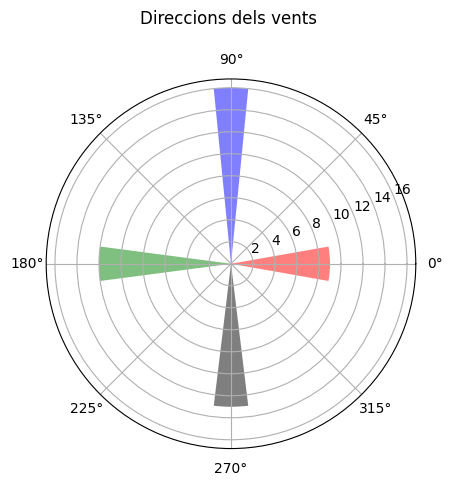

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 4 #direccions
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

width = np.pi / y
colors = ["red","blue","green","black"] # també podem definir els colors amb un string

ax = plt.subplot(projection='polar')
ax.bar(theta, y, width=width, bottom=0.0, color=colors, alpha=0.5)
plt.title("Direccions dels vents \n")
plt.show()

## Tipos de Visualizaciones

A continuación, revisaremos varios tipos de visualizaciones para que tengan algunos ejemplos a su disposición.

Existe una galería de ejemplos muy útil que pueden encontrar en el siguiente [enlace](https://matplotlib.org/stable/gallery/index.html).


### Barras
Los diagramas de barras son muy útiles. Ya hemos visto cómo dibujarlos directamente desde un _dataframe_ y también utilizando la biblioteca `matplotlib`.

<Axes: >

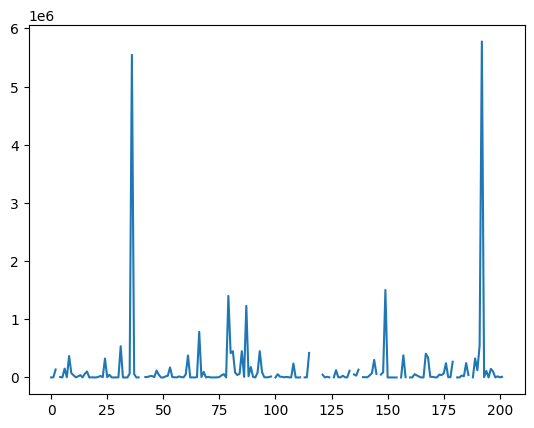

In [14]:
df = pd.read_csv("data/WHO.csv")

co2 = df["Total_CO2_emissions"]
co2.plot()

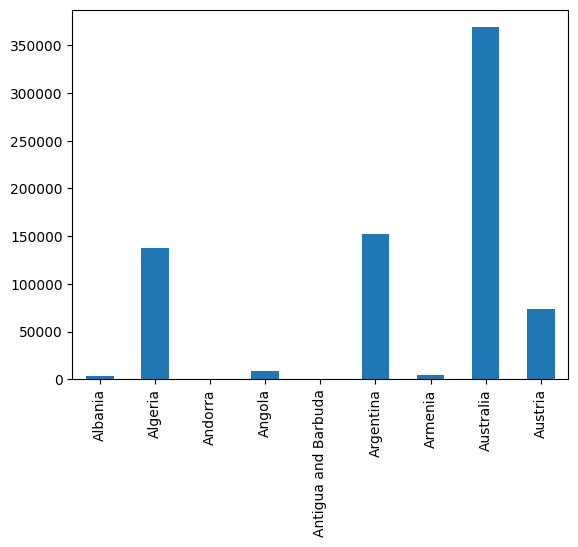

In [15]:
df = pd.read_csv("data/WHO.csv")

co2 = df["Total_CO2_emissions"][1:10]
ticks_labels = df["Country"][1:10].values

ax = co2.plot(kind="bar") # un plot retorna el component ax, combinam les dues lliberies
ax.set_xticklabels(ticks_labels)
plt.show()

Vamos a crear una segunda versión, seleccionando los datos que deseamos mostrar:

In [27]:
co2 = df["Total_CO2_emissions"].sort_values(ascending=False).head(10) 
labelsx = df.loc[co2.index]["Country"].values
print(labelsx)

co2.plot(kind="boxplot")

['United States of America' 'China' 'Russia' 'India' 'Japan' 'Germany'
 'United Kingdom' 'Canada' 'Korea, Rep.' 'Italy']


ValueError: boxplot is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

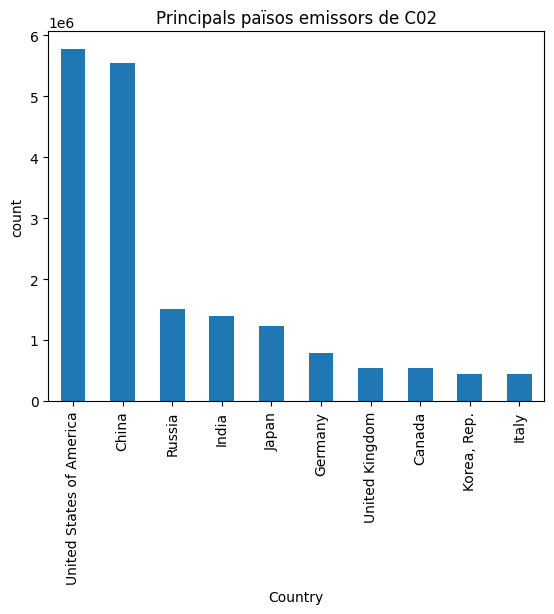

In [ ]:

dateSelect = df.loc[co2.index] # Noms
co2.index = dateSelect["Country"] 

ax = co2.plot(kind="bar") 
ax.set_ylabel("c02")
plt.title("Principals països emissors de C02")
plt.show()

### Histograma

Un histograma es una representación gráfica que muestra la distribución de datos numéricos en forma de barras verticales, donde cada barra representa la frecuencia o cantidad de veces que ocurren valores dentro de un rango específico.

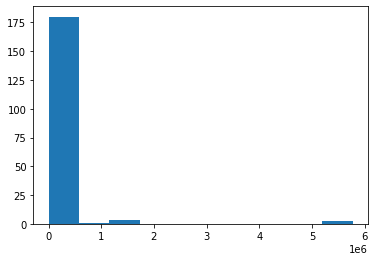

In [ ]:
co2 = df["Total_CO2_emissions"]
#co2.dropna(inplace=True) ##  NaN (NotAtNumber)
fig, ax = plt.subplots() # Definició forma
ax.hist(co2.values,bins=10) # la definició dels bins és molt rellevant en aquest tipus de gràfic ()
plt.show()

### Boxplots

Un diagrama de caja, también conocido como *boxplot* en inglés, es una representación gráfica utilizada para mostrar la distribución y estadísticas clave de un conjunto de datos. Esta representación consiste en un rectángulo que abarca el primer cuartil (Q1) y el tercer cuartil (Q3) de los datos, con una línea en el centro que indica la mediana. Las "whiskers" (o flechas) se extienden desde el rectángulo hasta los valores máximos y mínimos dentro de un rango específico, mientras que los puntos fuera de este rango se identifican como valores atípicos. Esto permite visualizar la dispersión, simetría y posibles valores atípicos en un conjunto de datos de manera concisa.

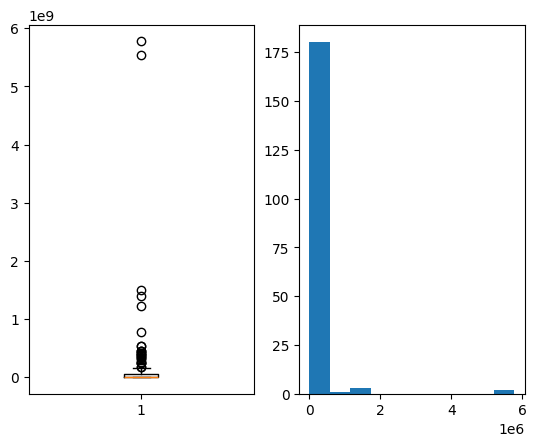

In [ ]:
co2 = df["Total_CO2_emissions"]
co2.dropna(inplace=True)

fig, axes = plt.subplots(ncols=2)  # Podem definir múltiples plots en el mateix gràfic

axes[0].boxplot(co2.values*1000)
axes[1].hist(co2)

plt.show()

# On estan els valors ?

### Gráficos de Líneas

Vamos a explorar cómo construir una visualización completa con diferentes propiedades, y aprovecharemos para crear un gráfico de líneas utilizando la función `plot`.

In [31]:
import numpy as np

xs = np.random.randn(3, 10000)
print(xs.shape)


(3, 10000)


In [32]:
bms = xs.cumsum(axis=1)
print(bms.shape)
print(bms[:5])

(3, 10000)
[[  1.45679632   0.1815815   -1.15099877 ... 170.89889557 171.83523836
  169.83064769]
 [ -0.58945149  -1.93826989  -3.9467861  ...  -7.48893885  -9.07577731
  -11.3621614 ]
 [ -0.23544607  -0.46014732  -0.65049252 ...  69.69337505  70.98829081
   71.93789955]]


Text(0.5, 1.0, 'Random motion')

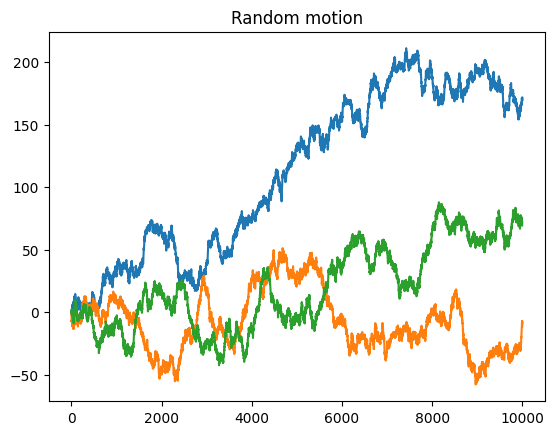

In [33]:
fig, ax = plt.subplots()
for bm in bms:
    ax.plot(bm)
plt.title("Random motion")

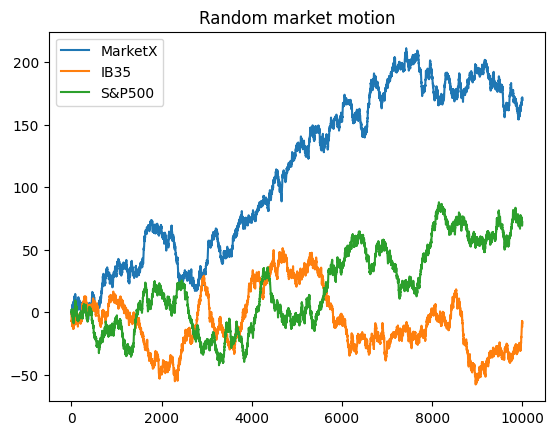

In [ ]:
labels = ["MarketX","IB35","S&P500"]
fig, ax = plt.subplots()


for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e])


plt.title("Random market motion")
plt.legend()    
plt.show()

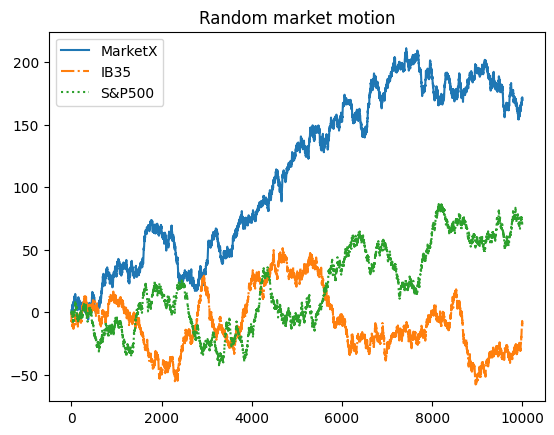

In [35]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

labels = ["MarketX","IB35","S&P500"]
lstyle = ["solid","dashdot","dotted"]
fig, ax = plt.subplots()
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e],linestyle=lstyle[e])
plt.title("Random market motion")
plt.legend()    
plt.show()


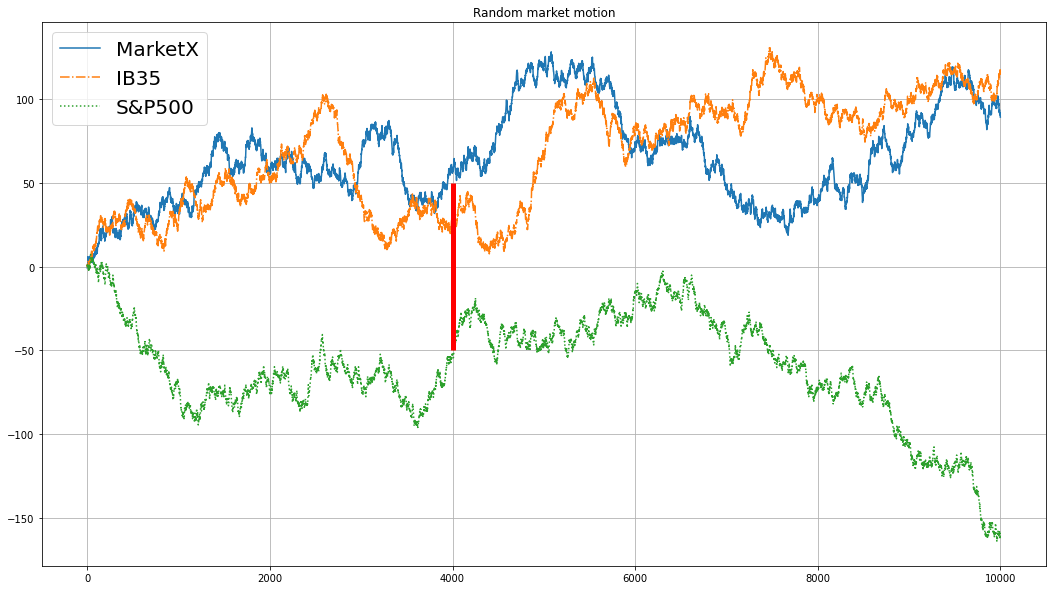

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

labels = ["MarketX","IB35","S&P500"]
lstyle = ["solid","dashdot","dotted"]
fig, ax = plt.subplots(figsize=(18,10)) #diferent mida
for e,bm in enumerate(bms):
    ax.plot(bm, label=labels[e],linestyle=lstyle[e])

ax.vlines(x=4000,ymin=-50,ymax=50,color="red",linewidth=5) 
plt.title("Random market motion")
plt.legend(prop={'size': 20})    # Alerta! Prova de llevar aquesta "prop" (propietat)
plt.grid()  # grid # Alerta! El Grid moltes vegades no és necessari
plt.show()

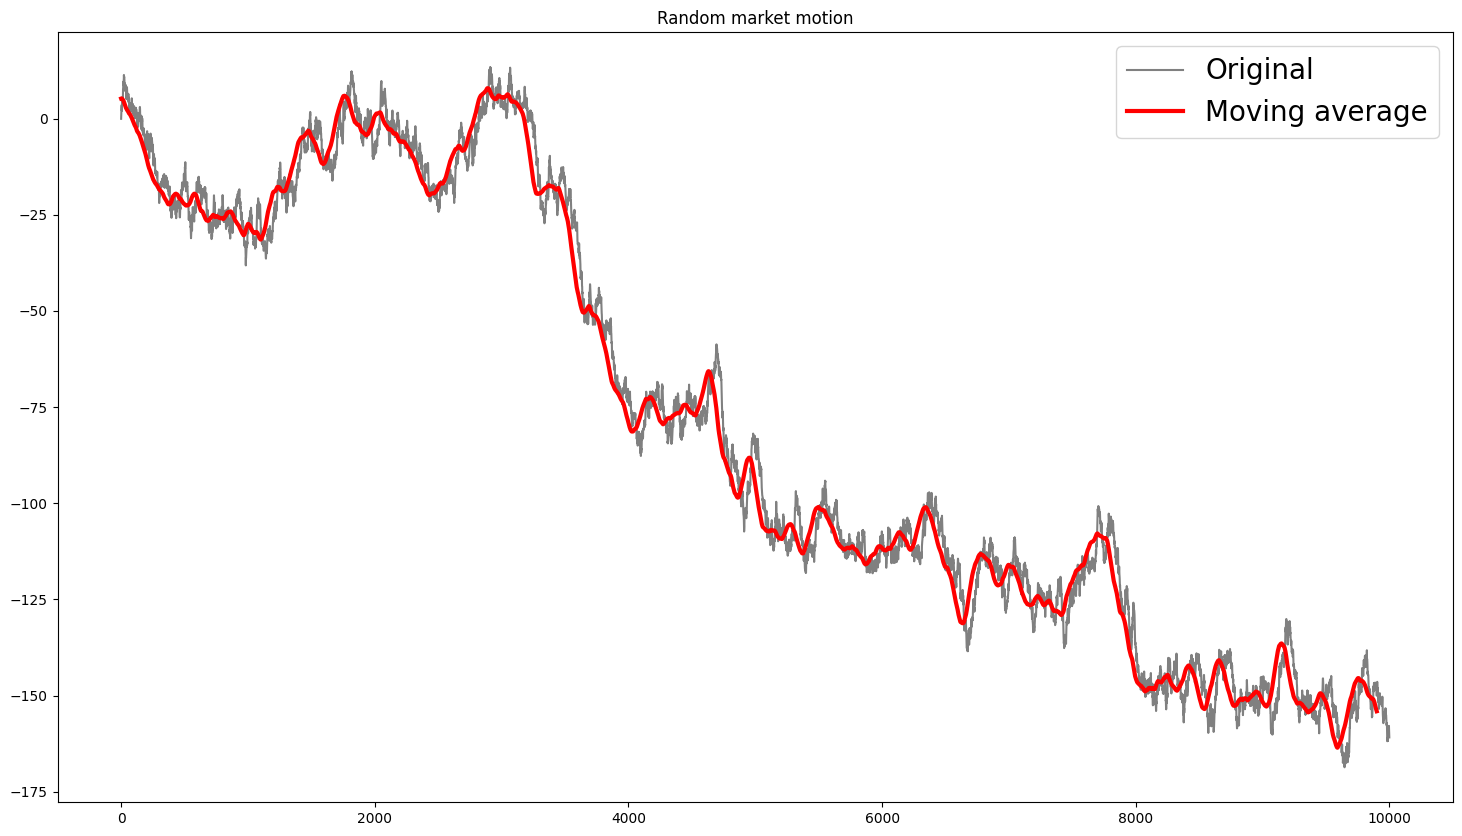

In [36]:
# Podem millorar certes visualitzacions de sèries fent filtratge de les dades
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

xs = np.random.randn(10000)
bms = xs.cumsum()
bmsMA = moving_average(bms,100)


fig, ax = plt.subplots(figsize=(18,10)) #diferent mida
ax.plot(bms, label="Original",color="gray")
ax.plot(bmsMA, label="Moving average",color="red",linewidth=3)
plt.title("Random market motion")
plt.legend(prop={'size': 20})   
plt.show()


## Biblioteca Seaborn

Seaborn es una biblioteca de visualización de datos para Python que se utiliza para crear gráficos estadísticos atractivos e informativos. Esta biblioteca simplifica la creación de gráficos como histogramas, diagramas de caja, gráficos de dispersión y muchos otros, y ofrece una interfaz fácil de usar que permite personalizar la apariencia de los gráficos.

[Página web](https://seaborn.pydata.org/)

In [ ]:
!pip install seaborn

In [38]:

!uv add seaborn

Resolved 97 packages in 10ms
Audited 92 packages in 0.31ms


In [41]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


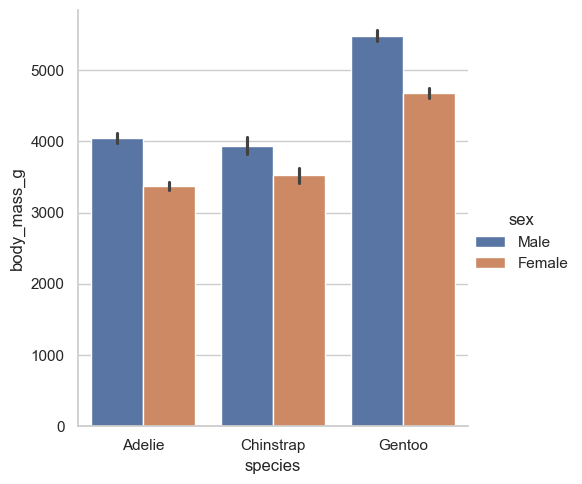

In [42]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex"
)


In [43]:
import seaborn as sns

dfwho = pd.read_csv("data/WHO.csv", usecols=[0,1,2,185,67,4])
dfwho.columns =['Country', 'CountryID', 'Continent', 'LiteracyRate', 'TotalExpenditureHealth',
       'CO2_emissions']

continents = {1:"Africa",2:"Europa",3:"Africa",4:"North America",7:"Asia",6:"Asia",5:"South America"}
dfwho.replace({"Continent": continents},inplace=True)              
              
print(list(dfwho.columns))
print("Dimensions del dataframe:", dfwho.shape)

['Country', 'CountryID', 'Continent', 'LiteracyRate', 'TotalExpenditureHealth', 'CO2_emissions']
Dimensions del dataframe: (202, 6)


In [44]:
dfwho.head()

,Country,CountryID,Continent,LiteracyRate,TotalExpenditureHealth,CO2_emissions
0,Afghanistan,1,Africa,28.0,5.4,0.02
1,Albania,2,Europa,98.7,6.2,0.98
2,Algeria,3,Africa,69.9,3.6,4.23
3,Andorra,4,Europa,NaN,6.3,NaN
4,Angola,5,Africa,67.4,2.7,0.76


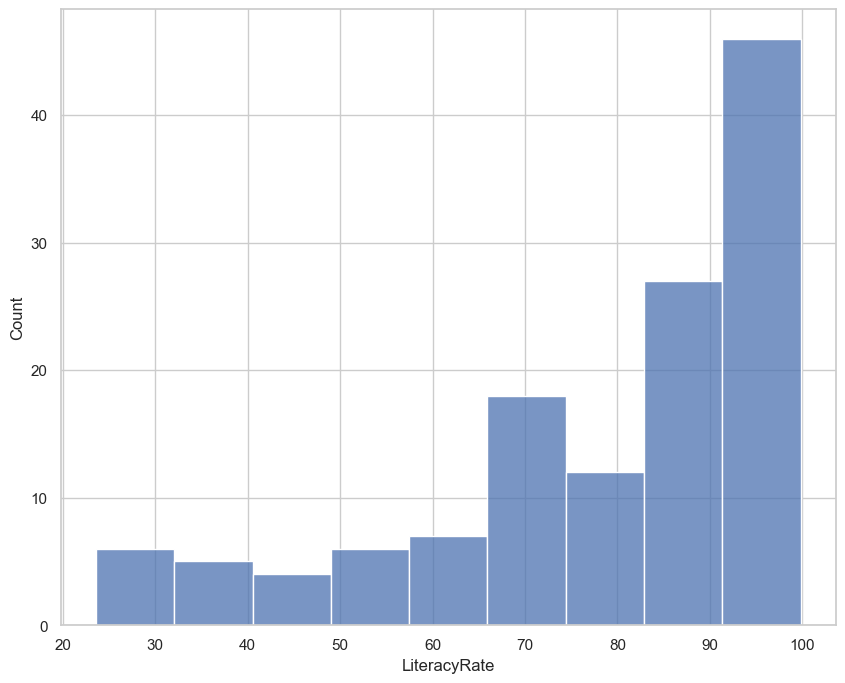

In [47]:
# https://seaborn.pydata.org/generated/seaborn.histplot.html

fig, ax = plt.subplots(figsize=(10, 8)) # Establim el marc de dibuix
sns.histplot(dfwho, x="LiteracyRate")
plt.show()

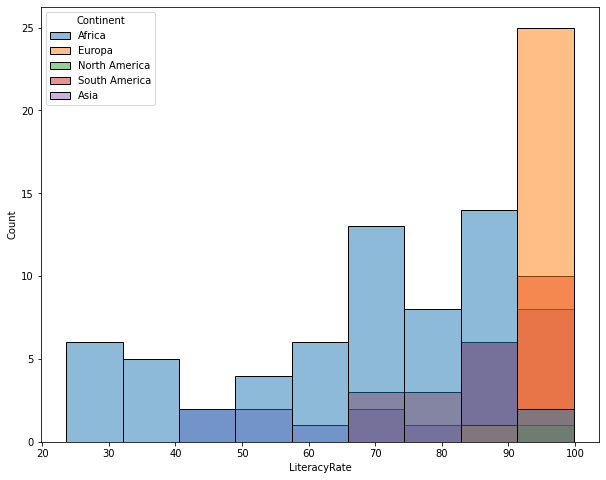

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(dfwho,x="LiteracyRate", hue="Continent")
plt.show()

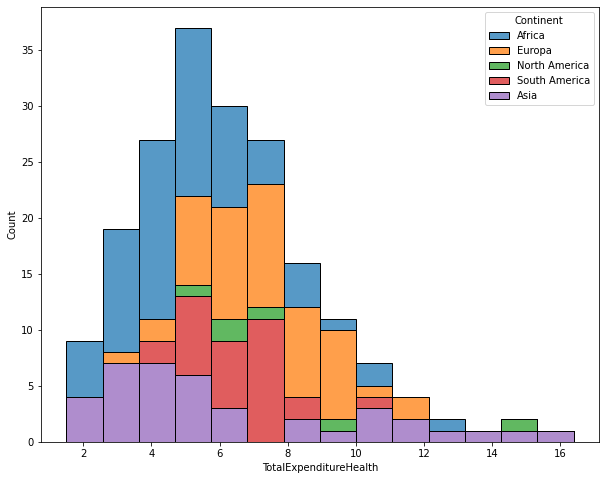

In [ ]:
#matplotlib
fig, ax = plt.subplots(figsize=(10, 8))

#seaborn
sns.histplot(dfwho,x="TotalExpenditureHealth", hue="Continent", multiple="stack")



plt.show()

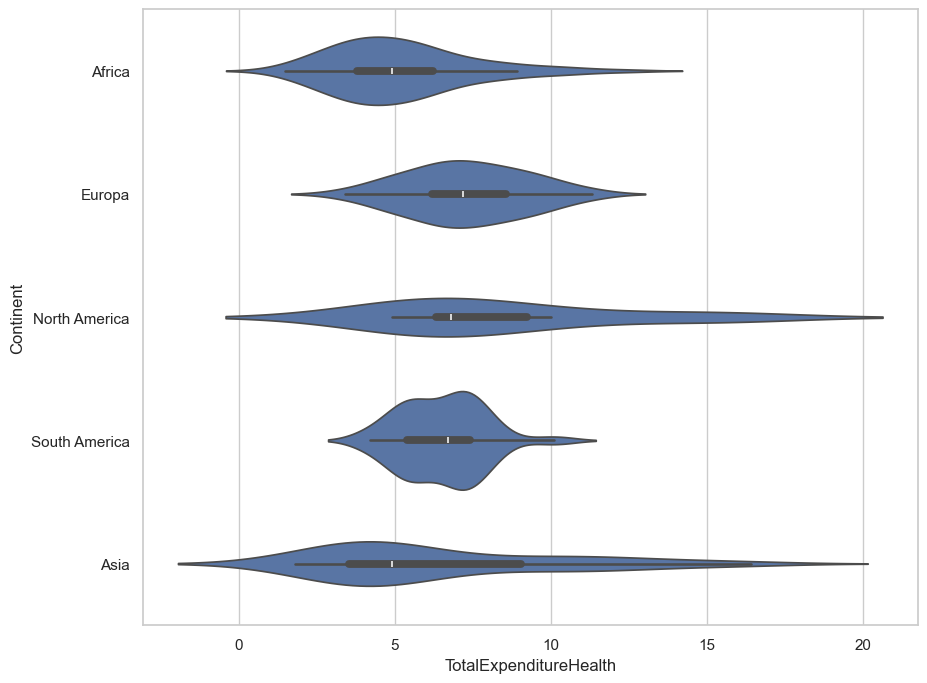

In [48]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html

fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x=dfwho["TotalExpenditureHealth"],y=dfwho.Continent)
plt.show()

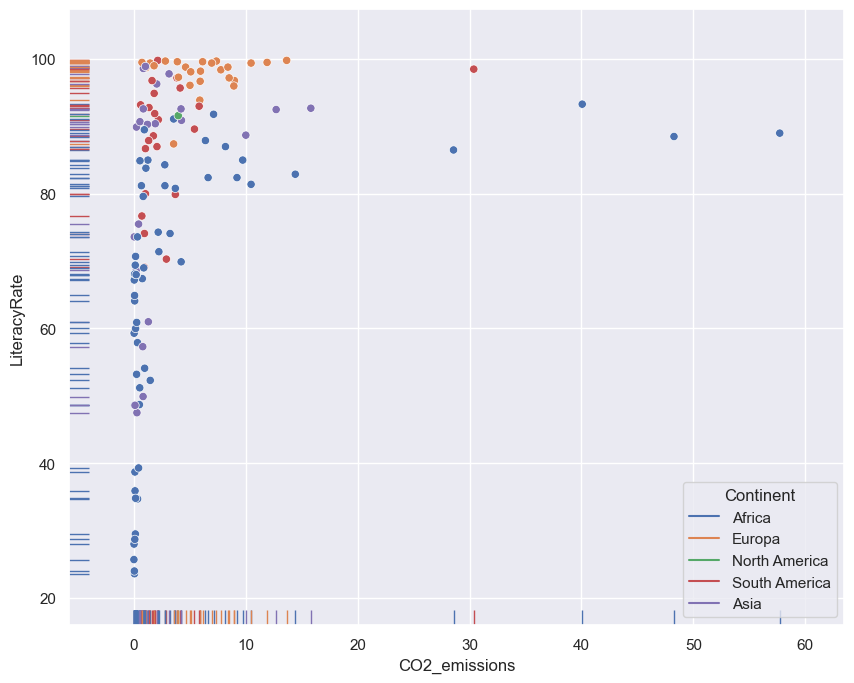

In [49]:
# https://seaborn.pydata.org/generated/seaborn.rugplot.html
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=dfwho, x="CO2_emissions", y="LiteracyRate",hue="Continent")
sns.rugplot(data=dfwho, x="CO2_emissions", y="LiteracyRate",hue="Continent")
plt.show()

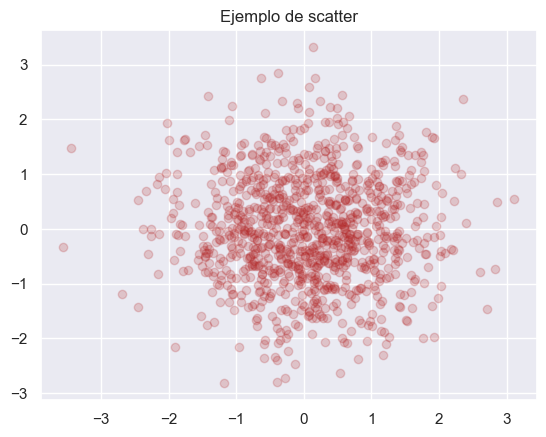

In [50]:
# Otro escenario
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

plt.scatter(x, y, c='firebrick', alpha=0.2)
plt.title("Ejemplo de scatter")
plt.show()

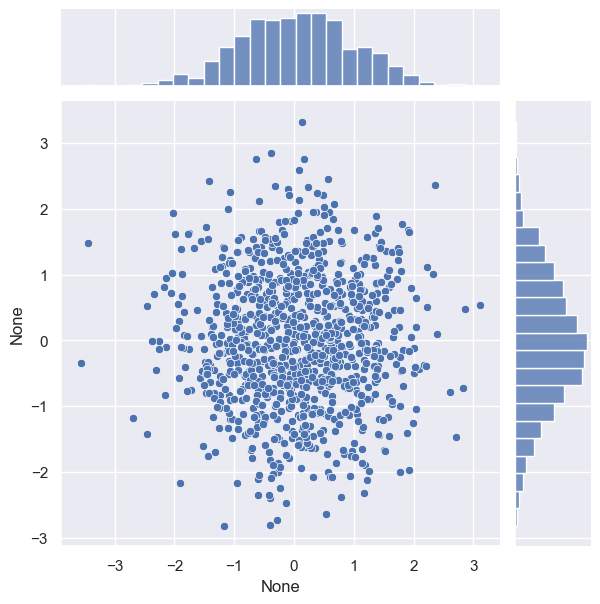

In [51]:
#Usamos la libreria seaborn
sns.jointplot(x=x, y=y)


### Ejercicios


**A) Utilizando el archivo "who.csv",**
- ¿Podrías mostrar un gráfico con los 10 países más poblados ("Población (en miles) total")?
- ¿Y otro con los 10 menos poblados?

Nota: Ten en cuenta que los valores "NaN" pueden afectar la visualización.

**B) Representa en un gráfico de barras el crecimiento de población  (*Population annual growth rate (%))* de los paises del top 10 más poblados.**

**C) Representa con un boxplot la contaminació (CO2) (`CO2_emissions`) de Europa (codi continent: 2)**

**D) Con el fichero `data_groups.csv`, visualiza la distribución de ciudades y puntos de candidatos.**

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Isaac Lera and Gabriel Moya <br/>
Universitat de les Illes Balears <br/>
isaac.lera@uib.edu, gabriel.moya@uib.edu